<a href="https://colab.research.google.com/github/mon2jain/ML_Project-Employee-Churn-Prediction/blob/main/Employee_Churn_Prediction_ML_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis (EDA)**

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#create dataframe to read dataset
df=pd.read_csv('hr_employee_churn_data.csv')

In [3]:
#check the dataframe and its data
df.head()

,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
0,1,0.38,0.53,2,157,3,0,0,low,1
1,2,0.80,0.86,5,262,6,0,0,medium,1
2,3,0.11,0.88,7,272,4,0,0,medium,1
3,4,0.72,0.87,5,223,5,0,0,low,1
4,5,0.37,0.52,2,159,3,0,0,low,1


In [4]:
#check dataframe structure like columns and its datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   empid                  14999 non-null  int64  
 1   satisfaction_level     14997 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  int64  
 4   average_montly_hours   14999 non-null  int64  
 5   time_spend_company     14999 non-null  int64  
 6   Work_accident          14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   salary                 14999 non-null  object 
 9   left                   14999 non-null  int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 1.1+ MB


In [5]:
# check the num of rows and columns in dataframe
df.shape

(14999, 10)

In [6]:
df.describe()

,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left
count,14999.000000,14997.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7500.000000,0.612863,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268,0.238083
std,4329.982679,0.248634,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281,0.425924
min,1.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,3750.500000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,7500.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,11249.500000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,14999.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [7]:
df['Work_accident'].unique()

array([0, 1])

In [8]:
df['promotion_last_5years'].unique()

array([0, 1])

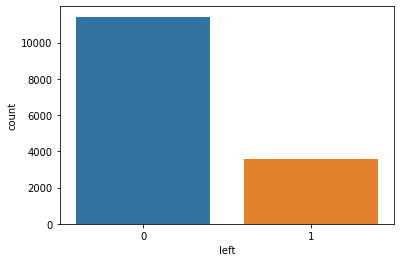

In [9]:
# check total employee range based on target column that left
sns.countplot(x='left',data=df)
plt.show()
#Take-away: in the training set, less people left than didn't.it seems there is data imbalance..

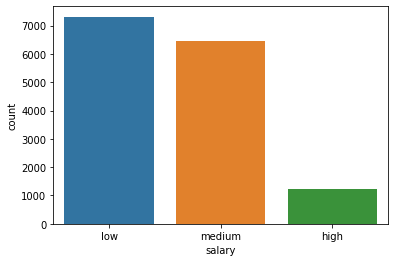

In [10]:
#feature 'salary'
sns.countplot(x='salary', data=df)
#take-away: low salaried employee count is high in given dataset as expected

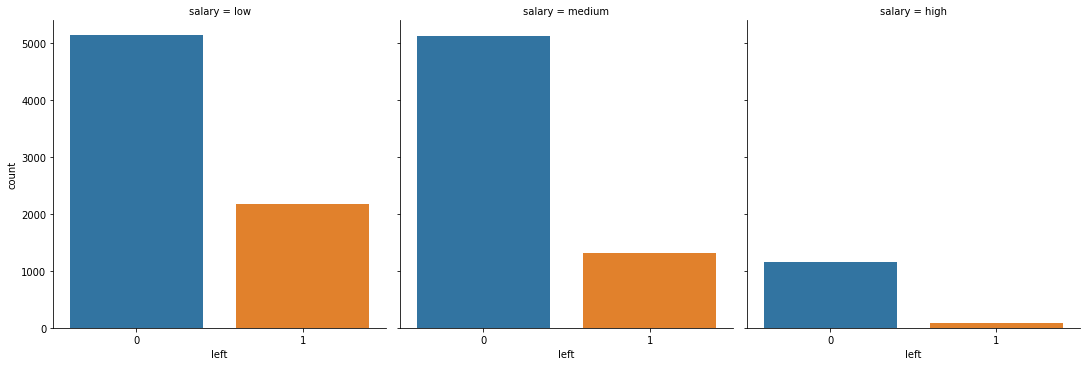

In [11]:
#feature 'left' split over the feature 'salary'.
sns.catplot(x='left', col='salary', kind='count', data=df);
#Take-away: it seem low salaried employees have high churning rate

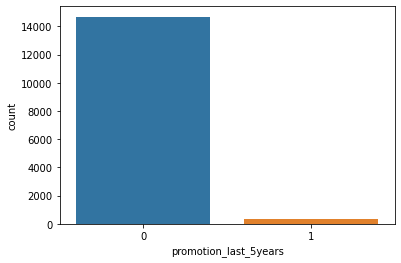

In [12]:
#feature 'promotion_last_5years'
sns.countplot(x='promotion_last_5years', data=df)
#take-away: non promoted emp count is high

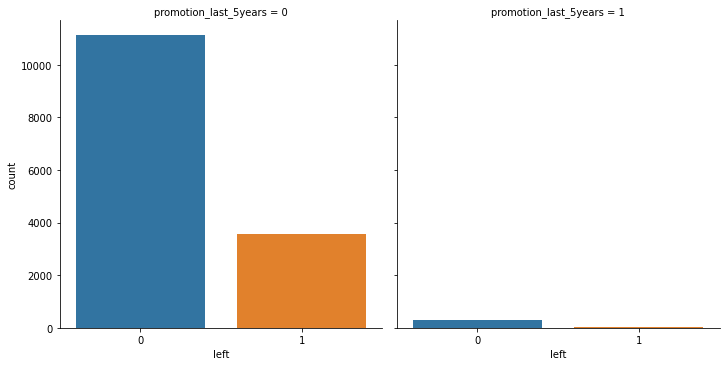

In [13]:
#feature 'left' split over the feature 'promotion_last_5years'.
#fig = plt.figure(figsize=(15,7))
sns.catplot(x='left', col='promotion_last_5years', kind='count', data=df);
#Take-away: it seems non promoted people left more

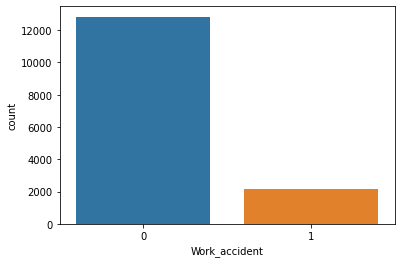

In [14]:
#feature 'Work_accident'
sns.countplot(x='Work_accident', data=df)
#take-away: have less people who made Work_accident

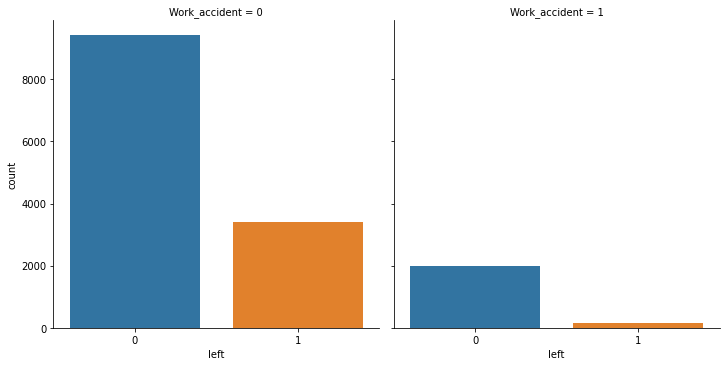

In [15]:
#feature 'left' split over the feature 'Work_accident'.
#fig = plt.figure(figsize=(15,7))
sns.catplot(x='left', col='Work_accident', kind='count', data=df);
#Take-away: it seems people left more who did not made accident...we can say it is less imp feature 

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


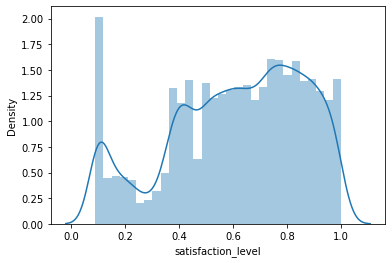

In [16]:
# satisfaction_level : plot a univariate distribution of observations
sns.distplot(df['satisfaction_level'])
#take-away: sl distributed from 0.1 to 1 where it has high count at 0.1

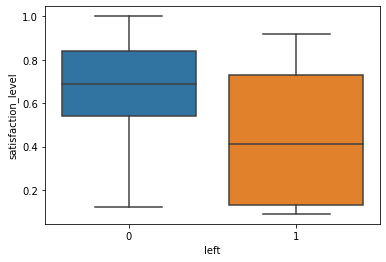

In [17]:
#box plot to show distributions with respect to categories
sns.boxplot(x="left", y= "satisfaction_level", data=df)
#take-away: employee left most who has less satisfication level range from 0.2 to 0.5

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


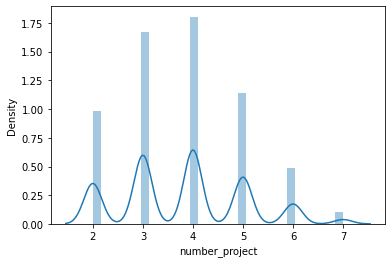

In [18]:
# number_project : plot a univariate distribution of observations
sns.distplot(df['number_project'])
#take-away: number_project distributed from 2 to 7 where it has high count at 4

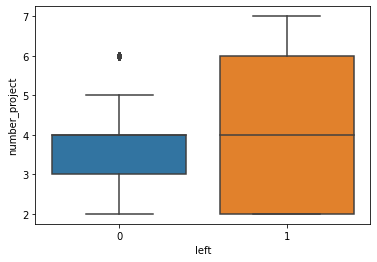

In [19]:
#box plot to show distributions with respect to categories
sns.boxplot(x="left", y= "number_project", data=df)
#take-away: employee left when project count high.and employee retain who has number_project between 3-4

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


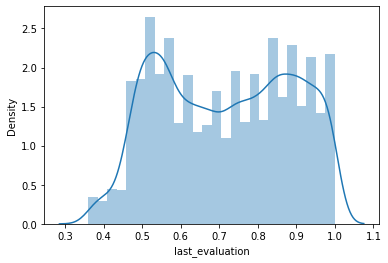

In [20]:
# last_evaluation : plot a univariate distribution of observations
sns.distplot(df['last_evaluation'])
#take-away: last_evaluation distributed from 0.35 to 1 where it has high count at around 0.55

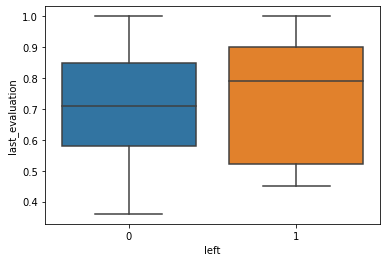

In [21]:
#box plot to show distributions with respect to categories
sns.boxplot(x="left", y= "last_evaluation", data=df)
#take-away: not much impact but employee left who has high last_evaluation value

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


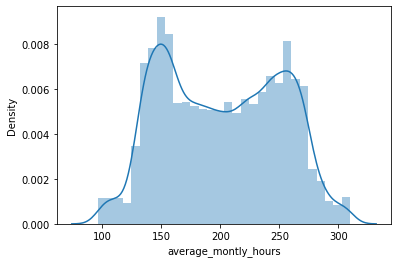

In [22]:
# average_montly_hours : plot a univariate distribution of observations
sns.distplot(df['average_montly_hours'])
#take-away: average_montly_hours distributed from 100 to 300 where it has high count at around 150

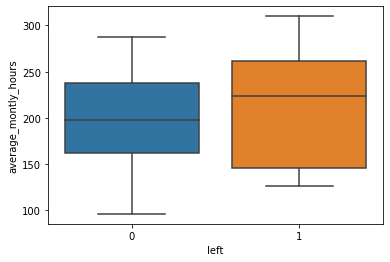

In [23]:
#box plot to show distributions with respect to categories
sns.boxplot(x="left", y= "average_montly_hours", data=df)
#take-away: employee left who has high average_montly_hours value

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


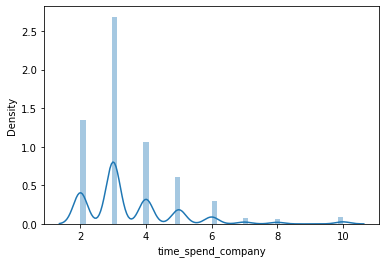

In [24]:
# time_spend_company : plot a univariate distribution of observations
sns.distplot(df['time_spend_company'])
#take-away: time_spend_company distributed from 2 to 10 where it has high count at around 3 and low at 9

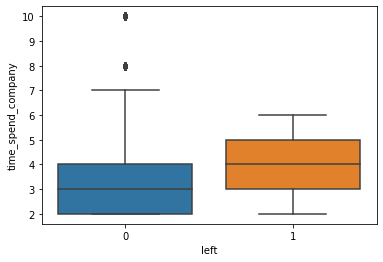

In [25]:
#box plot to show distributions with respect to categories
sns.boxplot(x="left", y= "time_spend_company", data=df)
#take-away: employee left who has high time_spend_company value...

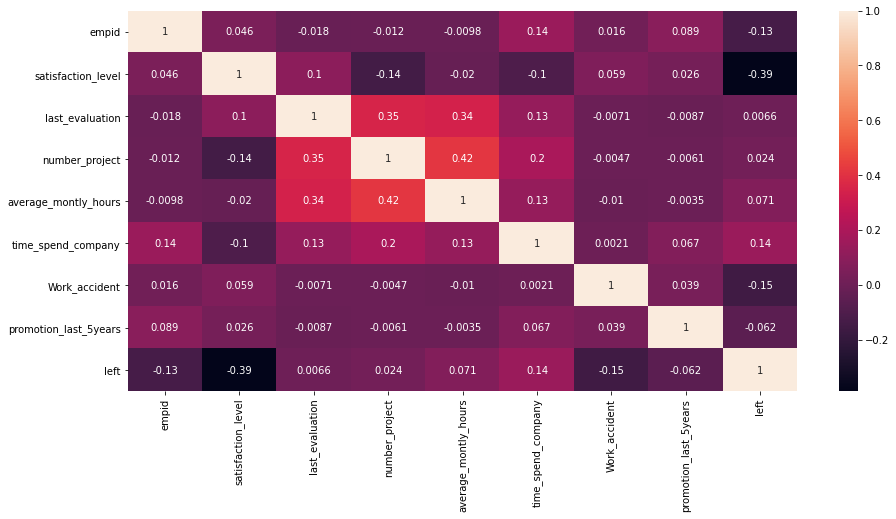

In [26]:
## Checking for correlation
cor_mat=df.corr()
fig = plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,annot=True)

In [27]:
## Checking for pairplot
#sns.pairplot(df)

# **Feature Engineering**

In [28]:
df1=df.copy()

In [29]:
df1.head()

,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
0,1,0.38,0.53,2,157,3,0,0,low,1
1,2,0.80,0.86,5,262,6,0,0,medium,1
2,3,0.11,0.88,7,272,4,0,0,medium,1
3,4,0.72,0.87,5,223,5,0,0,low,1
4,5,0.37,0.52,2,159,3,0,0,low,1


In [30]:
df1.drop(['empid'], axis=1, inplace=True)

In [31]:
df1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
0,0.38,0.53,2,157,3,0,0,low,1
1,0.80,0.86,5,262,6,0,0,medium,1
2,0.11,0.88,7,272,4,0,0,medium,1
3,0.72,0.87,5,223,5,0,0,low,1
4,0.37,0.52,2,159,3,0,0,low,1


In [32]:
## onehotencoding the categorical values
df2=pd.get_dummies(df1,drop_first=True)

In [33]:
df2.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,1,1,0
1,0.80,0.86,5,262,6,0,0,1,0,1
2,0.11,0.88,7,272,4,0,0,1,0,1
3,0.72,0.87,5,223,5,0,0,1,1,0
4,0.37,0.52,2,159,3,0,0,1,1,0


In [34]:
df2.isnull().sum()

satisfaction_level       2
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
left                     0
salary_low               0
salary_medium            0
dtype: int64

In [35]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14997 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   promotion_last_5years  14999 non-null  int64  
 7   left                   14999 non-null  int64  
 8   salary_low             14999 non-null  uint8  
 9   salary_medium          14999 non-null  uint8  
dtypes: float64(2), int64(6), uint8(2)
memory usage: 966.9 KB


In [36]:
##handling missing values
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
df3 = imputer.fit_transform(df2)

In [37]:
df_final = pd.DataFrame(df3, columns=df2.columns)

In [38]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  float64
 3   average_montly_hours   14999 non-null  float64
 4   time_spend_company     14999 non-null  float64
 5   Work_accident          14999 non-null  float64
 6   promotion_last_5years  14999 non-null  float64
 7   left                   14999 non-null  float64
 8   salary_low             14999 non-null  float64
 9   salary_medium          14999 non-null  float64
dtypes: float64(10)
memory usage: 1.1 MB


## **Train-Test Splitting**

In [39]:
#split dataset into features and label
X= df_final.drop(labels='left',axis=1)
y= df_final['left']

In [40]:
#split dataset into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

## **Model Selection**

In [41]:
# will try to use below two models that are RandomForestClassifier and XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [42]:
#create param
model_param = {
    'RandomForestClassifier':{
        'model':RandomForestClassifier(),
        'param':{
            'n_estimators': [10, 50, 100, 130], 
            'criterion': ['gini', 'entropy'],
            'max_depth': range(2, 4, 1), 
            'max_features': ['auto', 'log2']
        }
    },
    'XGBClassifier':{
        'model':XGBClassifier(objective='binary:logistic'),
        'param':{
           'learning_rate': [0.5, 0.1, 0.01, 0.001],
            'max_depth': [3, 5, 10, 20],
            'n_estimators': [10, 50, 100, 200]
        }
    }
}

In [44]:
scores =[]
for model_name, mp in model_param.items():
    model_selection = GridSearchCV(estimator=mp['model'],param_grid=mp['param'],cv=5,return_train_score=False)
    model_selection.fit(X,y)
    scores.append({
        'model': model_name,
        'best_score': model_selection.best_score_,
        'best_params': model_selection.best_params_
    })

In [45]:
scores

[{'best_params': {'criterion': 'entropy',
   'max_depth': 3,
   'max_features': 'log2',
   'n_estimators': 10},
  'best_score': 0.9253309992219629,
  'model': 'RandomForestClassifier'},
 {'best_params': {'learning_rate': 0.1, 'max_depth': 20, 'n_estimators': 200},
  'best_score': 0.9901995109480938,
  'model': 'XGBClassifier'}]